In [1]:
%matplotlib widget
import numpy as np
import os
import matplotlib.pyplot as plt
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
root_path = "semantic_3d_pointcloud/"

point = np.load(os.path.join(root_path, "point.npy"))
point = point*10000/255.
color = np.load(os.path.join(root_path, "color0255.npy"))
color = color/255.
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(point)
pcd.colors = o3d.utility.Vector3dVector(color)

points = np.asarray(pcd.points)
pcd = pcd.select_by_index(np.where(points[:, 1] < 0)[0])
points = np.asarray(pcd.points)
pcd = pcd.select_by_index(np.where(points[:, 1] > -1)[0])
points = np.asarray(pcd.points)
colors = np.asarray(pcd.colors)
int_colors = colors * 255
# colors *= 255
# plt.scatter(-points[:, 2], -points[:, 0], s=1, c=colors, alpha=0.5)

In [3]:
print("select target categories (refrigerator, rack, cushion, lamp, and cooktop")
color_dict = {
    "refrigerator":[255, 0, 0],
    "rack": [0, 255, 133],
    "cushion": [255, 9, 92],
    "lamp": [160, 150, 20],
    "cooktop": [7, 255, 224]
    }

offset = {
    "refrigerator":[-0.25, 0, 0],
    "rack": [0, 0, -0.3],
    "cushion": [0, 0, 0],
    "lamp": [0, 0, 0.5],
    "cooktop": [0.6, 0, 0]
}
target = input()
target_list = []
for i in range(len(int_colors)):
    if np.array_equal(int_colors[i], color_dict[target]):
        target_list.append(i)

target_point = np.mean(points[target_list], axis=0)
target_point += offset[target]

select target categories (refrigerator, rack, cushion, lamp, and cooktop


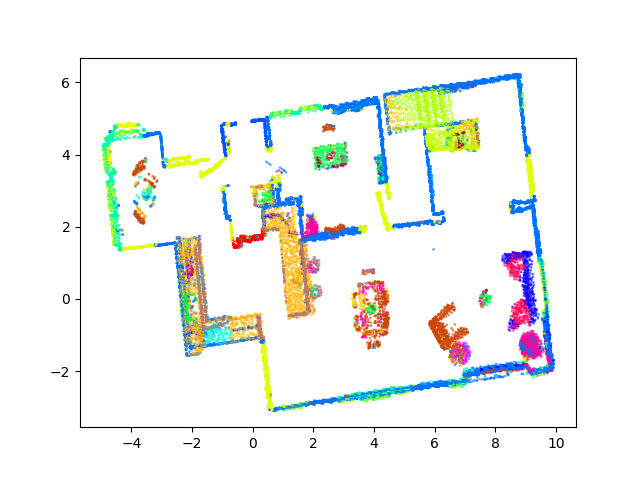

1.525214944609706 -2.024430131553203


In [4]:
fig = plt.figure()
map = fig.add_subplot()
map.scatter(points[:, 2], points[:, 0], s=1, c=colors, alpha=0.5)
coords = []

def onclick(event):
    global coords
    print(event.xdata, event.ydata)
    coords.append((event.xdata, event.ydata))
    fig.canvas.mpl_disconnect(cid)

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

[(1.525214944609706, -2.024430131553203)]


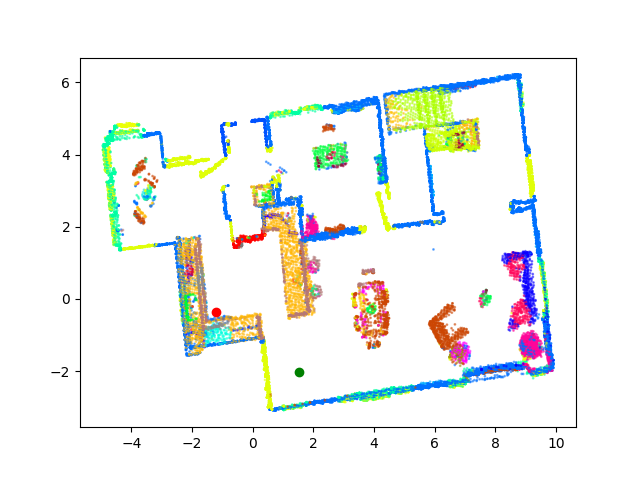

In [5]:
print(coords)
plt.plot(coords[0][0], coords[0][1], "og")
plt.plot(target_point[2], target_point[0], "or")
plt.show()